# SzCzGiE-labs

### Part I

In [169]:
# imports
import pandas as pd
# import matplotlib.pyplot as plt
from math import log10, log2, log
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [170]:
# loading data from csv
data = pd.read_csv('IBM.csv', parse_dates=['Date'])
N = len(data.index)
close = pd.Series(data['Close'], name='Close')
dates = pd.Series(data['Date'], name='Date')

In [171]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500


In [175]:
# separation of close price data
close = pd.DataFrame({'Date':data['Date'], 'Close':data['Close']})
close.set_index('Date')
pass

<AxesSubplot:title={'center':'Close'}, xlabel='Date'>

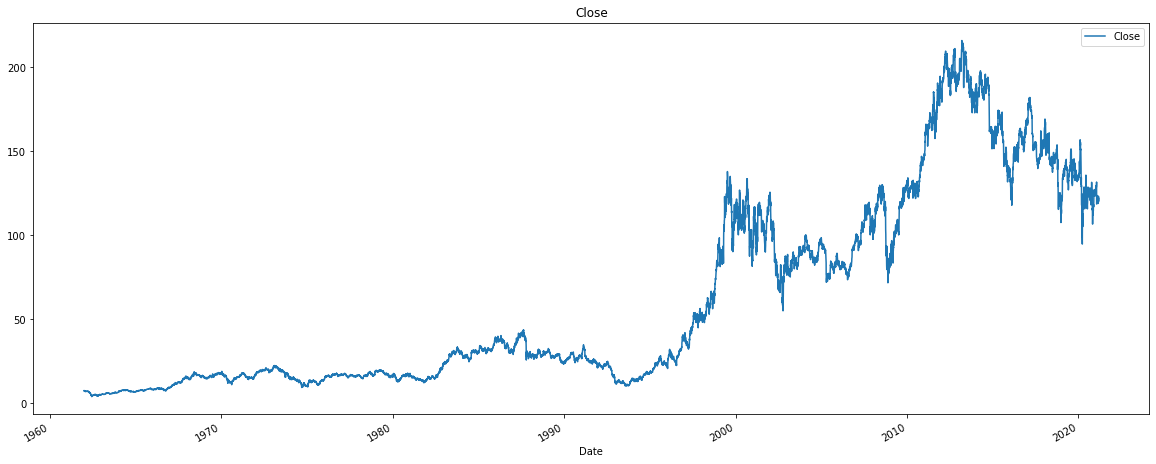

In [185]:
close.plot(figsize=(20,8), x='Date', y='Close', title='Close')

<AxesSubplot:title={'center':'log(Close)'}, xlabel='Date'>

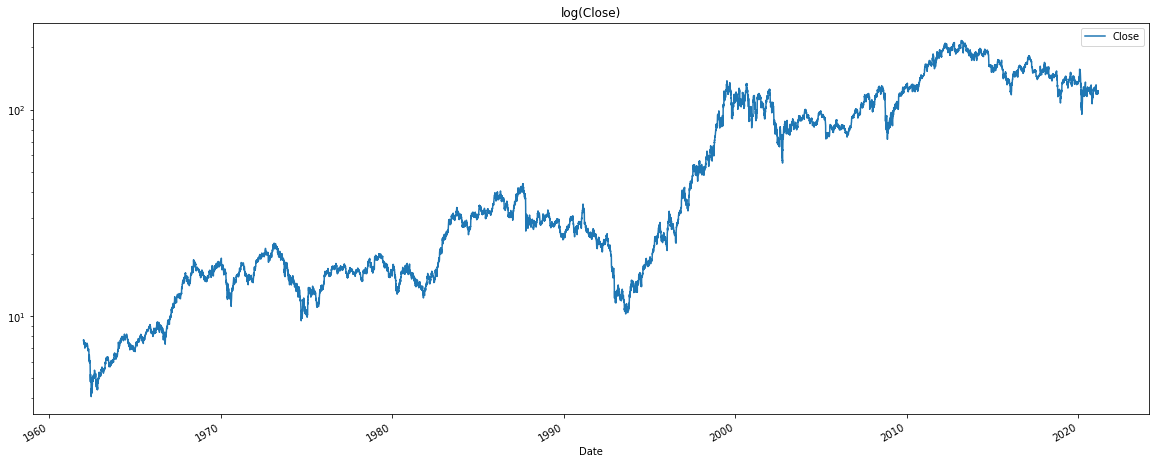

In [190]:
close.plot(figsize=(20,8), x='Date', y='Close', logy=True, title='log(Close)')

In [176]:
# logarithmic rates of return for close prices
close['LogReturnRates'] = pd.Series(np.array([0.0] + [log(close['Close'][i]/close['Close'][i-1]) for i in range(1, len(close['Close']))]))

<AxesSubplot:title={'center':'LogReturnRates'}, xlabel='Date'>

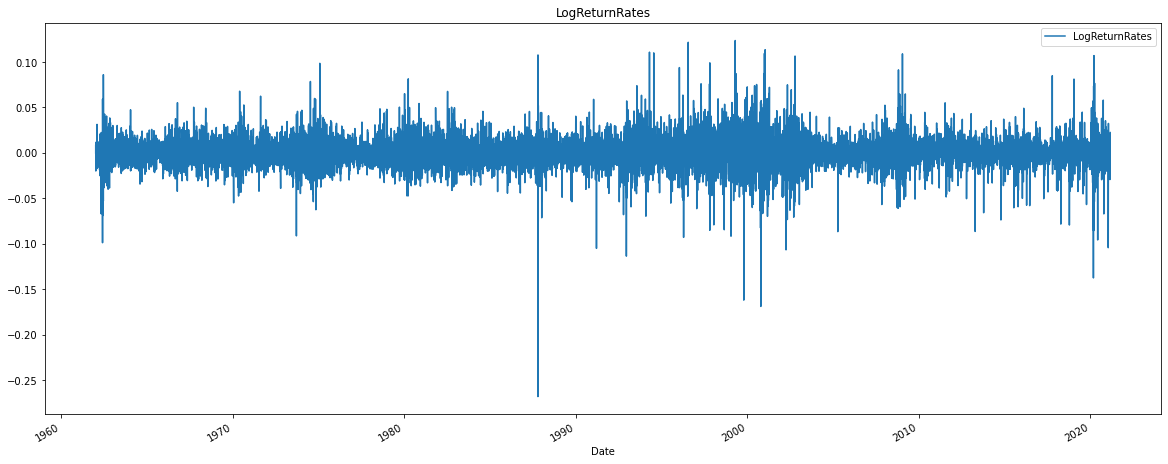

In [192]:
close.plot(figsize=(20,8), x='Date', y='LogReturnRates', title='LogReturnRates')

In [197]:
# standarized logarithimc rates of return for close prices (using z-score: std=1, mean=0)
close['Z-score']= (close['LogReturnRates'] - close['LogReturnRates'].mean()) / close['LogReturnRates'].std()
close.head()

,Date,Close,LogReturnRates,Z-score
0,1962-01-02,7.626667,0.000000,-0.011651
1,1962-01-03,7.693333,0.008703,0.531862
2,1962-01-04,7.616667,-0.010015,-0.637102
3,1962-01-05,7.466667,-0.019890,-1.253790
4,1962-01-08,7.326667,-0.018928,-1.193704


<AxesSubplot:title={'center':'Z-score(LogReturnRates)'}, xlabel='Date'>

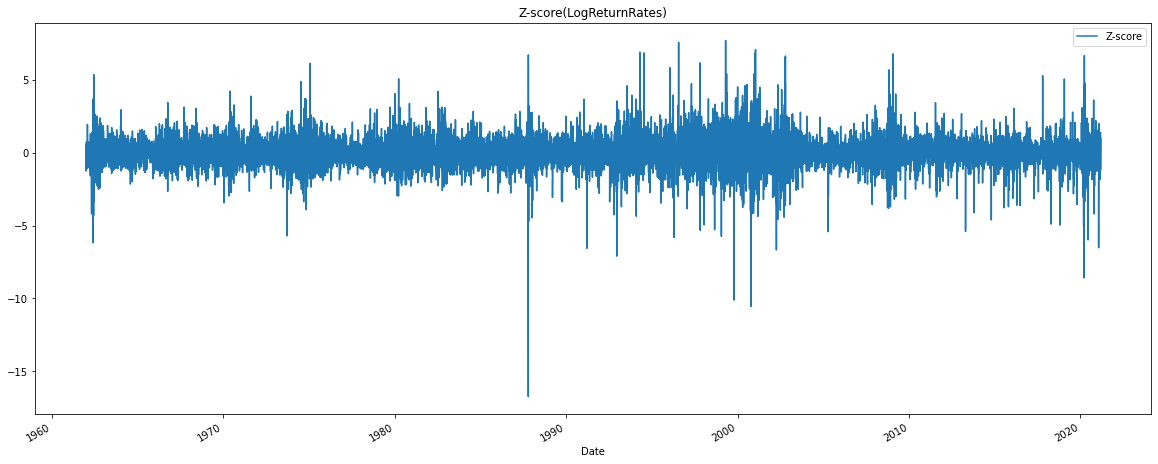

In [193]:
close.plot(figsize=(20,8), x='Date', y='Z-score', title='Z-score(LogReturnRates)')

### Part II

In [206]:
# white noise
mean = 0
std = 1
N = len(data['Close'])
white_noise = pd.DataFrame(data=np.random.normal(mean, std, size=N), columns=['WhiteNoise'], index=data['Date'])

<AxesSubplot:title={'center':'WhiteNoise'}, xlabel='Date'>

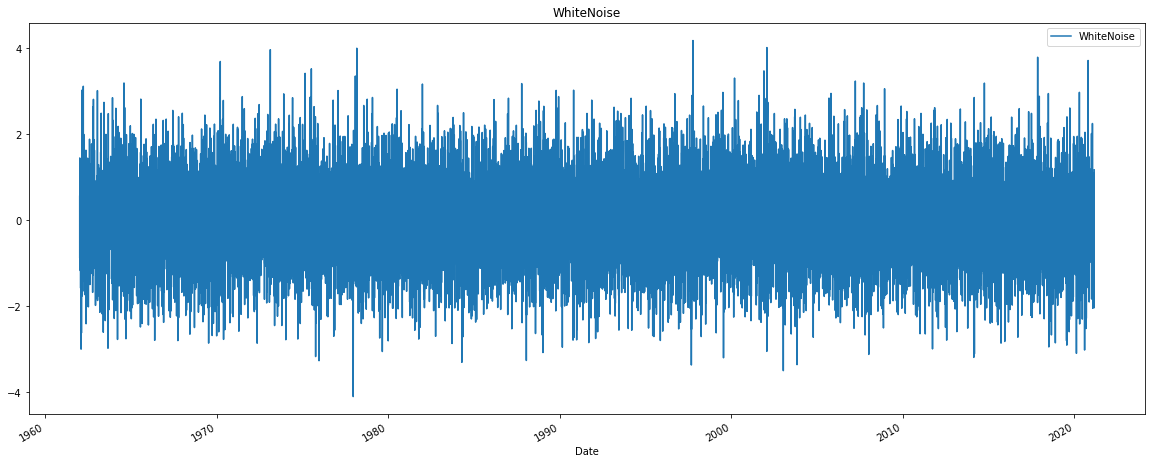

In [210]:
white_noise.plot(figsize=(20,8), y='WhiteNoise', title='WhiteNoise')

In [211]:
# white noise cumulative sume
white_noise['CumulativeSum'] = white_noise.cumsum()
white_noise.head()

,WhiteNoise,CumulativeSum
Date,,
1962-01-02,0.554942,0.554942
1962-01-03,-0.879376,-0.324434
1962-01-04,1.448381,1.123947
1962-01-05,0.075216,1.199163
1962-01-08,0.975717,2.174880


<AxesSubplot:title={'center':'CumulativeSum(WhiteNoise)'}, xlabel='Date'>

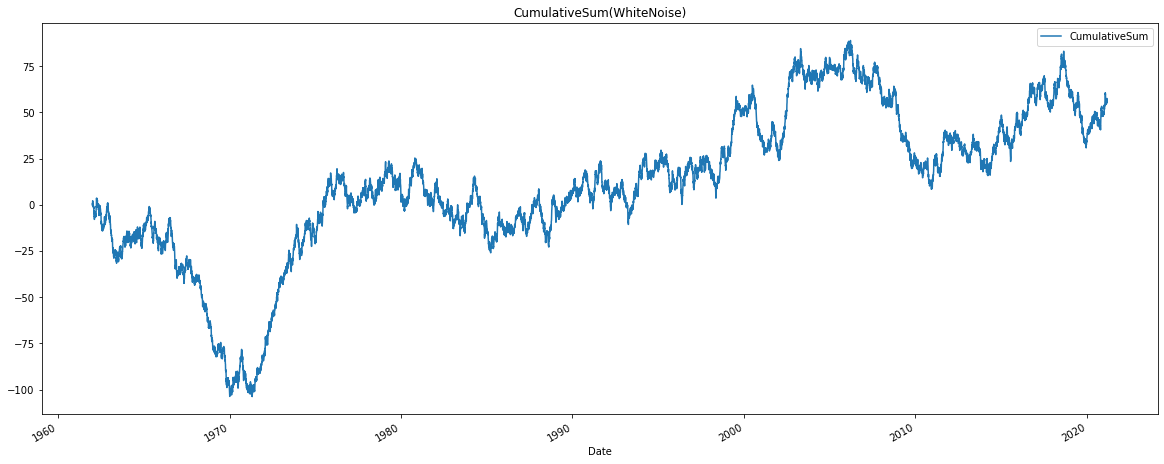

In [213]:
white_noise.plot(figsize=(20,8), y='CumulativeSum', title='CumulativeSum(WhiteNoise)')

<AxesSubplot:title={'center':'Close & CumulativeSum(WhiteNoise)'}, xlabel='Date'>

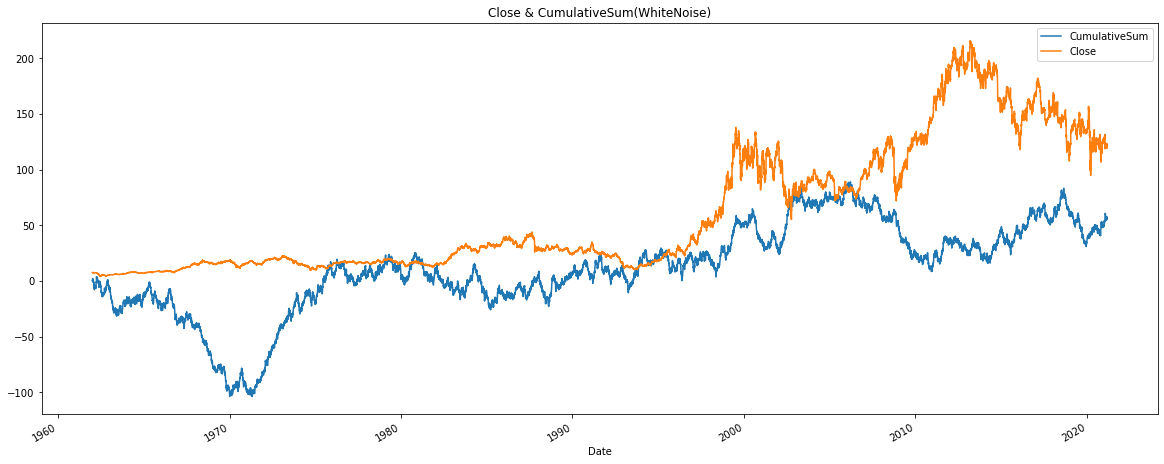

In [225]:
ax = white_noise.plot(y='CumulativeSum')
close.plot(figsize=(20,8), x='Date', y='Close', ax=ax, title='Close & CumulativeSum(WhiteNoise)', legend=True)

<AxesSubplot:title={'center':'Z-score(LogReturnRates(Close)) & WhiteNoise'}, xlabel='Date'>

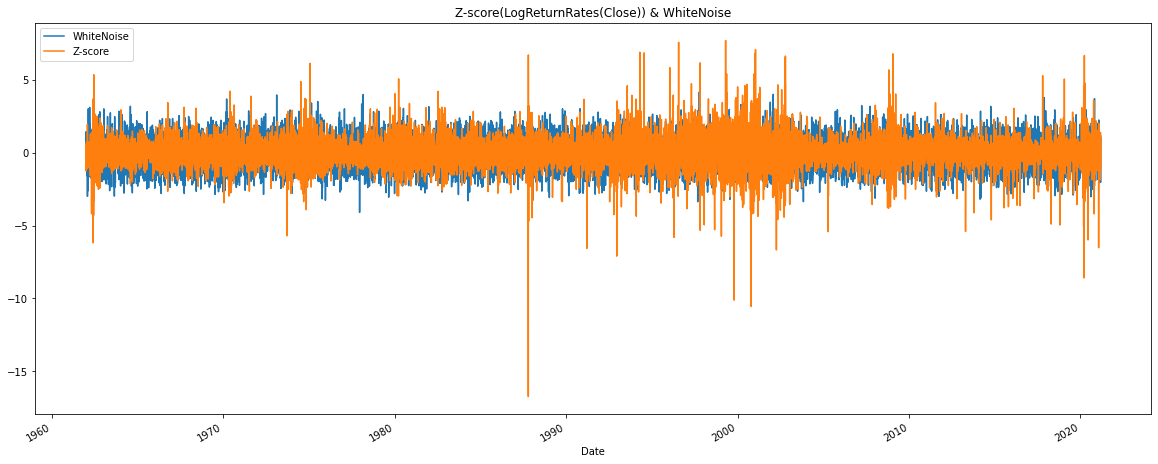

In [222]:
ax = white_noise.plot(y='WhiteNoise')
close.plot(figsize=(20,8), x='Date', y='Z-score', ax=ax, title='Z-score(LogReturnRates(Close)) & WhiteNoise', legend=True)

### Part III

Histograms

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Z-score'}>]], dtype=object)

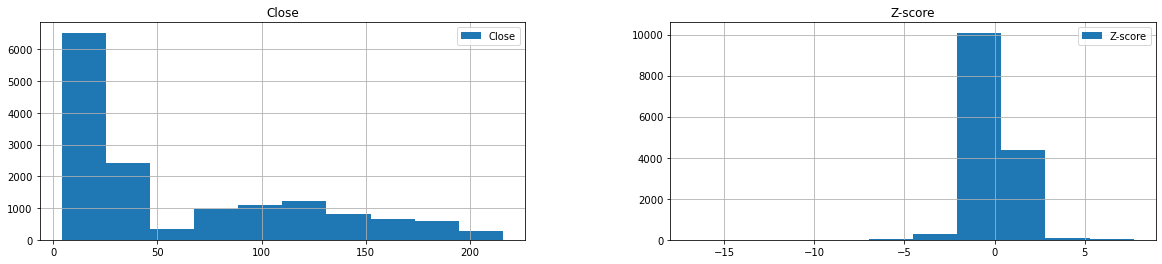

In [242]:
# Close prices histograms
close.hist(figsize=(20,4), column=['Close', 'Z-score'], legend=True)

array([[<AxesSubplot:title={'center':'CumulativeSum'}>,
        <AxesSubplot:title={'center':'WhiteNoise'}>]], dtype=object)

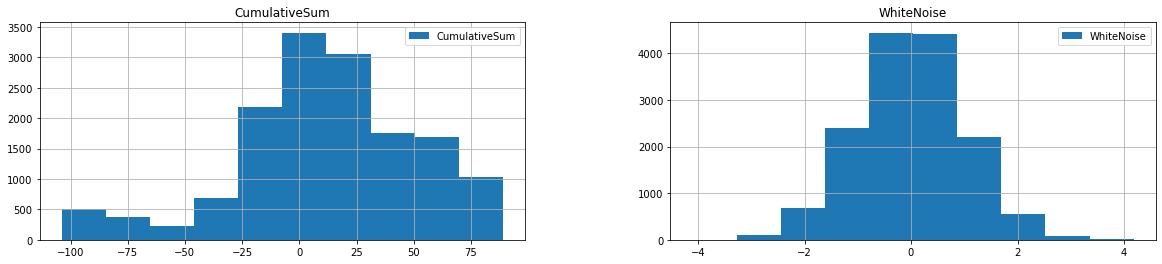

In [245]:
# White noise histograms
white_noise.hist(figsize=(20,4), column=['CumulativeSum', 'WhiteNoise'], legend=True)

array([[<AxesSubplot:title={'center':'NormalizedClose'}>,
        <AxesSubplot:title={'center':'NormalizedZ-score'}>]], dtype=object)

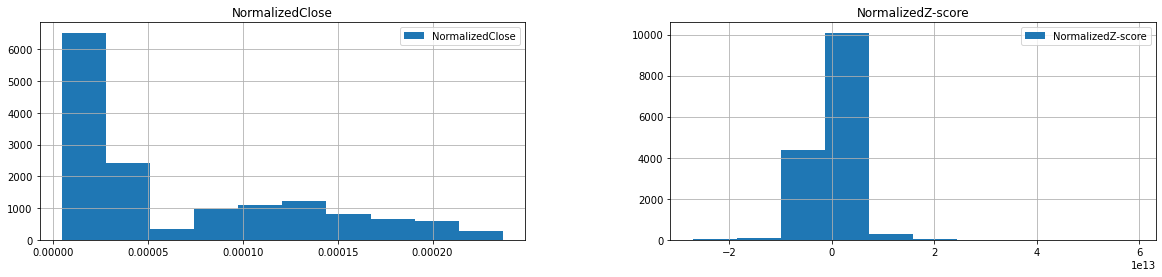

In [294]:
close['NormalizedClose'] = close['Close']/close['Close'].sum()
close['NormalizedZ-score'] = close['Z-score']/close['Z-score'].sum()
# Normalized Close prices histograms
close.hist(figsize=(20,4), column=['NormalizedClose', 'NormalizedZ-score'], legend=True)

array([[<AxesSubplot:title={'center':'NormalizedCumulativeSum'}>,
        <AxesSubplot:title={'center':'NormalizedWhiteNoise'}>]],
      dtype=object)

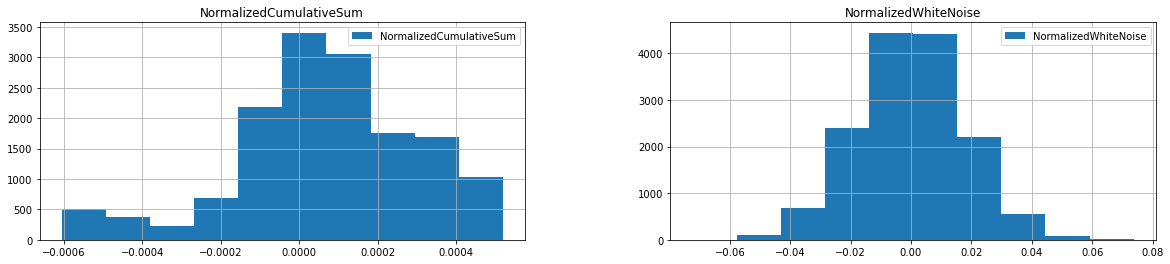

In [295]:
white_noise['NormalizedCumulativeSum'] = white_noise['CumulativeSum']/white_noise['CumulativeSum'].sum()
white_noise['NormalizedWhiteNoise'] = white_noise['WhiteNoise']/white_noise['WhiteNoise'].sum()
# Normalized White noise histograms
white_noise.hist(figsize=(20,4), column=['NormalizedCumulativeSum', 'NormalizedWhiteNoise'], legend=True)

array([<AxesSubplot:title={'center':'NormalizedClose'}>], dtype=object)

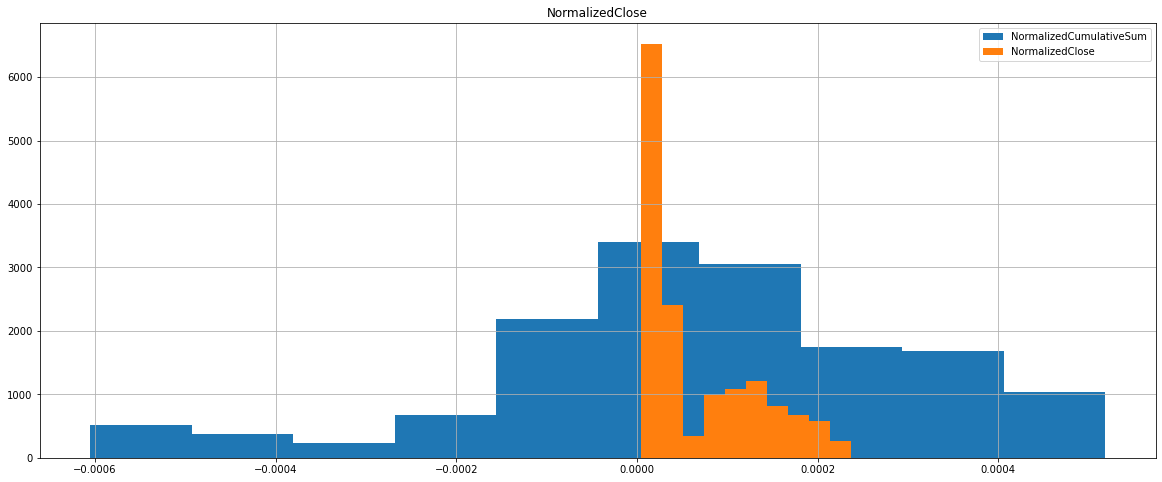

In [296]:
ax = white_noise.hist(figsize=(20,8), column=['NormalizedCumulativeSum'], legend=True)
close.hist(figsize=(20,8), column=['NormalizedClose'], ax=ax, legend=True)

array([<AxesSubplot:title={'center':'NormalizedZ-score'}>], dtype=object)

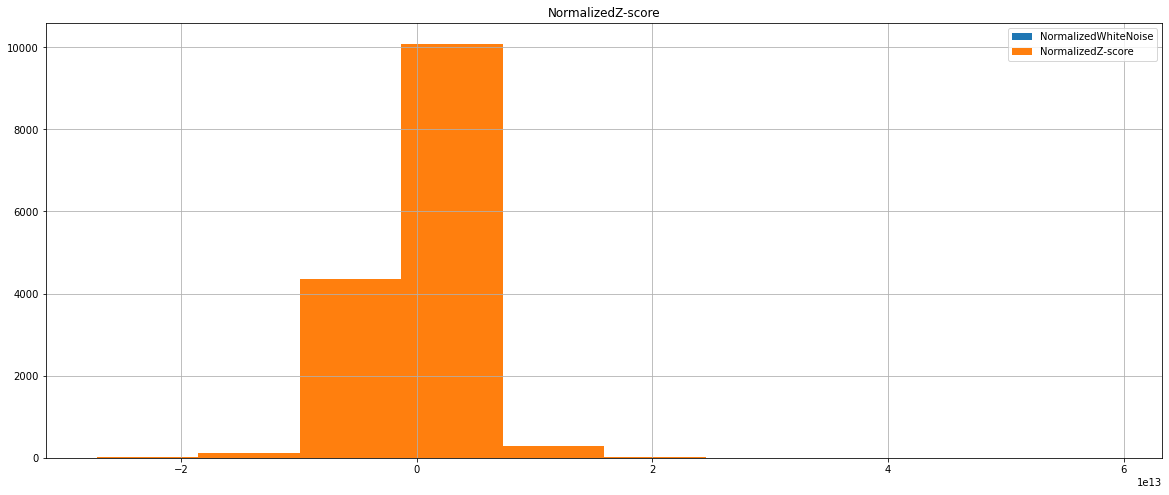

In [297]:
ax = white_noise.hist(figsize=(20,8), column=['NormalizedWhiteNoise'], legend=True)
close.hist(figsize=(20,8), column=['NormalizedZ-score'], ax=ax, legend=True)

Distribution parameters

In [264]:
# close prices kurtosis
close.kurt(axis=0)

Close                -0.485366
LogReturnRates       12.239468
Z-score              12.239468
NormalizedClose      -0.485366
NormalizedZ-score    12.239468
dtype: float64

In [265]:
# close prices skeweness
close.skew(axis=0)

Close                0.924353
LogReturnRates      -0.342694
Z-score             -0.342694
NormalizedClose      0.924353
NormalizedZ-score    0.342694
dtype: float64

In [266]:
# white noise kurtosis
white_noise.kurt(axis=0)

WhiteNoise                 0.045022
CumulativeSum              0.542037
NormalizedCumulativeSum    0.542037
NormalizedWhiteNoise       0.045022
dtype: float64

In [267]:
# white noise skeweness
white_noise.skew(axis=0)

WhiteNoise                 0.009543
CumulativeSum             -0.612881
NormalizedCumulativeSum   -0.612881
NormalizedWhiteNoise       0.009543
dtype: float64